### jupyter notebook for the exploratory data analysis of the onet data

author: Jan Jörg
date: 14.03.2024

In [262]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import json
from itertools import chain
from db import get_database

In [263]:
dbname = get_database()
collection = dbname["with_id"]
education = dbname["education"]
job_zone = dbname["job_zone"]

documents = collection.find()
education =  pd.DataFrame(list(education.find()))
job_zone = pd.DataFrame(list(job_zone.find()))
df = pd.DataFrame(list(documents))

df.head(2)

,_id,occupation,tasks,knowledge,skills,abilities,work_activities,detailed_work_activities,work_context,job_zone,interests,work_styles,work_values,education,isco08,Name_de
0,661d1a30d05f1cef398e0e97,Actors,"[1, 2, 3, 4, 5]","{'element': [{'id': '2.C.7.c', 'related': 'htt...","[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]","{'element': [{'id': '4.A.4.a.4', 'related': 'h...","{'activity': [{'id': '4.A.4.a.8.I01.D04', 'rel...","{'element': [{'id': '4.C.1.b.1.e', 'related': ...",1,"{'high_point_code': 'ASE', 'element': [{'id': ...","{'element': [{'id': '1.C.3.a', 'related': 'htt...","{'element': [{'id': '1.B.2.d', 'related': 'htt...",1,2655,Schauspieler
1,661d1a30d05f1cef398e0e98,Actuaries,"[6, 7, 8, 9, 10]","{'element': [{'id': '2.C.4.a', 'related': 'htt...","[5, 6, 7, 1, 3]","[6, 7, 8, 9, 10]","{'element': [{'id': '4.A.2.a.4', 'related': 'h...","{'activity': [{'id': '4.A.4.b.4.I09.D06', 'rel...","{'element': [{'id': '4.C.1.a.2.h', 'related': ...",2,"{'high_point_code': 'CIE', 'element': [{'id': ...","{'element': [{'id': '1.C.7.b', 'related': 'htt...","{'element': [{'id': '1.B.2.b', 'related': 'htt...",2,2120,"Mathematiker, Aktuare und Statistiker"


In [264]:
cols_to_remove = ["knowledge", "work_activities","detailed_work_activities","interests","work_styles","work_values","isco08","Name_de","_id","work_context"]

df = df.drop(cols_to_remove, axis=1)

df.head(2)

,occupation,tasks,skills,abilities,job_zone,education
0,Actors,"[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]",1,1
1,Actuaries,"[6, 7, 8, 9, 10]","[5, 6, 7, 1, 3]","[6, 7, 8, 9, 10]",2,2


In [265]:
df['education'] = df['education'].astype(int)
df['job_zone'] = df['job_zone'].astype(int)

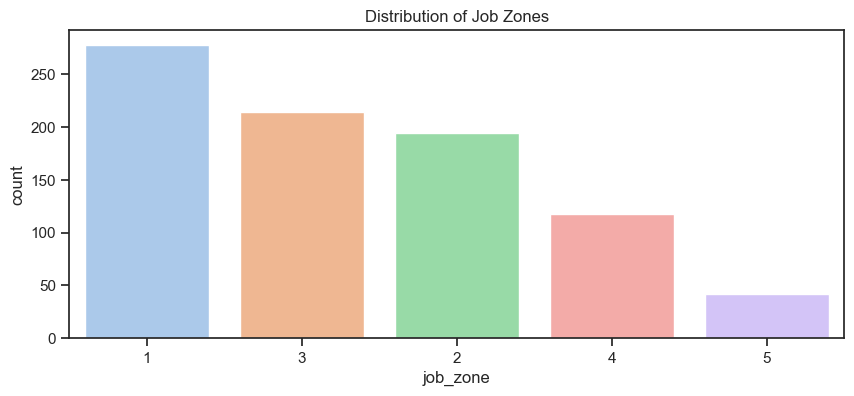

Zone 1:  These occupations usually require a high school diploma.
Zone 2:  Most of these occupations require a four-year bachelor's degree, but some do not.
Zone 3:  Most occupations in this zone require training in vocational schools, related on-the-job experience, or an associate's degree.
Zone 4:  Most of these occupations require graduate school. For example, they may require a master's degree, and some require a Ph.D., M.D., or J.D. (law degree).
Zone 5:  Some of these occupations may require a high school diploma or GED certificate.


In [266]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='job_zone', order = df['job_zone'].value_counts().index)
plt.title('Distribution of Job Zones')
plt.show()

for i, row in job_zone.iterrows():
    print(f"Zone {row['job_zone_id']}:  {row['education']}")

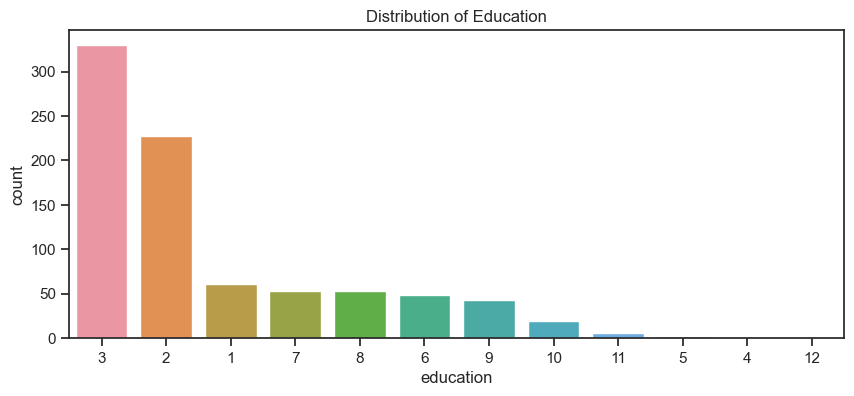

1:  Less than high school diploma
2:  Bachelor's degree
3:  High school diploma or equivalent
4:  Post-baccalaureate certificate
5:  Professional degree
6:  Associate's degree
7:  Master's degree
8:  Post-secondary certificate
9:  Doctoral degree
10:  Some college, no degree
11:  Post-doctoral training
12:  Post-master's certificate


In [267]:
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='education', order = df['education'].value_counts().index)
plt.title('Distribution of Education')
plt.show()

for i, row in education.iterrows():
    print(f"{row['education_id']}:  {row['name']}")

In [269]:
# Flatten the list of tasks and count the occurrences of each task
task_counts = Counter(chain.from_iterable(df["tasks"].tolist()))

# Get the top 10 most common tasks
top_10_tasks = task_counts.most_common(10)

# Print the top 10 tasks
for rank, (task, count) in enumerate(top_10_tasks, start=1):
    print(f"Task {task} is used in {count} jobs")

Task 1116 is used in 13 jobs
Task 1117 is used in 13 jobs
Task 1118 is used in 13 jobs
Task 1119 is used in 13 jobs
Task 1120 is used in 13 jobs
Task 1136 is used in 11 jobs
Task 1137 is used in 11 jobs
Task 1138 is used in 11 jobs
Task 1139 is used in 11 jobs
Task 1140 is used in 11 jobs


In [270]:
# Count the occurrences of each count value
count_counts = Counter(task_counts.values())

# Print the count counts
for task_count, job_count in count_counts.items():
    print(f"{job_count} tasks are used in {task_count} jobs")

2644 tasks are used in 1 jobs
105 tasks are used in 3 jobs
10 tasks are used in 6 jobs
305 tasks are used in 2 jobs
35 tasks are used in 7 jobs
35 tasks are used in 4 jobs
10 tasks are used in 5 jobs
5 tasks are used in 13 jobs
5 tasks are used in 11 jobs
5 tasks are used in 9 jobs


In [271]:
# remove tasks, since they are mostly only correlated to the specific job. only a few tasks are used in multiple jobs
cols_to_remove = ["tasks"]

df = df.drop(cols_to_remove, axis=1)

df.head(2)

,occupation,skills,abilities,job_zone,education
0,Actors,"[1, 2, 3, 4, 5]","[1, 2, 3, 4, 5]",1,1
1,Actuaries,"[5, 6, 7, 1, 3]","[6, 7, 8, 9, 10]",2,2


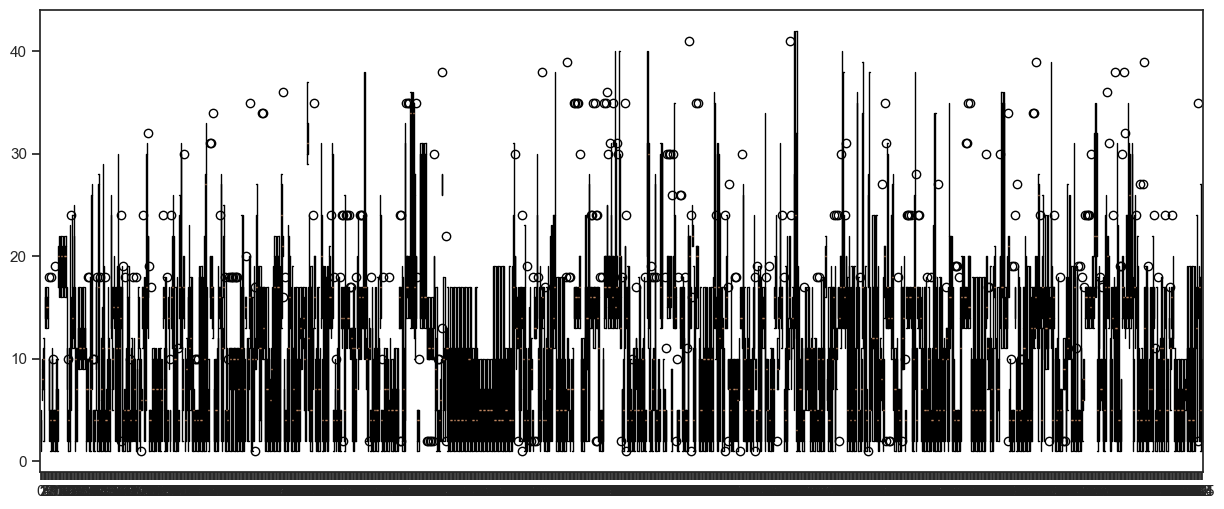

In [272]:
plt.figure(figsize=(15, 6))
plt.boxplot(df["abilities"], positions=range(len(df["abilities"])))
plt.show()